In [1]:
from src.misc import load_yaml
from src.build import build_dl, build_model, build_trainer

In [2]:
args = load_yaml('config/config.yaml')
train_dl, test_dl = build_dl(args)
encoder, simple = build_model(args)

trainer = build_trainer(
    args = args,
    encoder = encoder,
    simple = simple,
    dl = train_dl
)

In [3]:
for i in range(10001):
    loss = trainer.step()
    if i % 1000 == 0:
        print(f'EPOCH: {i}, LOSS: {loss:.6f}')

EPOCH: 0, LOSS: 2.466722
EPOCH: 1000, LOSS: 0.575871
EPOCH: 2000, LOSS: 0.556965
EPOCH: 3000, LOSS: 0.332908
EPOCH: 4000, LOSS: 0.231596
EPOCH: 5000, LOSS: 0.208568
EPOCH: 6000, LOSS: 0.180162
EPOCH: 7000, LOSS: 0.184064
EPOCH: 8000, LOSS: 0.169501
EPOCH: 9000, LOSS: 0.177259
EPOCH: 10000, LOSS: 0.184019


In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from src.misc import fix_dtype

model = trainer.encoder
model.eval()

images = []
xs = []
ys = []
for data in test_dl:
    data = {k: v.to('cuda') for k, v in data.items()}
    data = fix_dtype(data)

    with torch.no_grad():
        x = model(data['image'])
    x = x.detach().cpu().numpy()
    y = data['label'].cpu().numpy()

    image = data['image'].cpu().numpy().reshape(-1, 1 * 32 * 32)
    images.append(image)
    xs.append(x)
    ys.append(y)
    
images = np.concatenate(images)
xs = np.concatenate(xs)
ys = np.concatenate(ys)

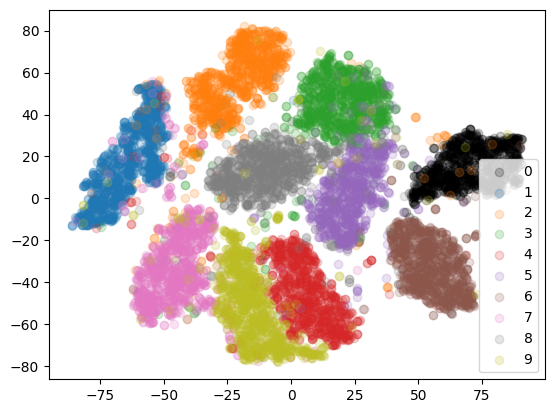

In [18]:
tsne = TSNE(n_components = 2)
t = tsne.fit_transform(images)

for i in np.unique(ys):
    index = np.where(ys == i)[0]
    plt.scatter(t[index][:, 0], t[index][:, 1], alpha = 0.2, label = i, color = 'k' if i == 0 else None)
plt.legend()
plt.show()

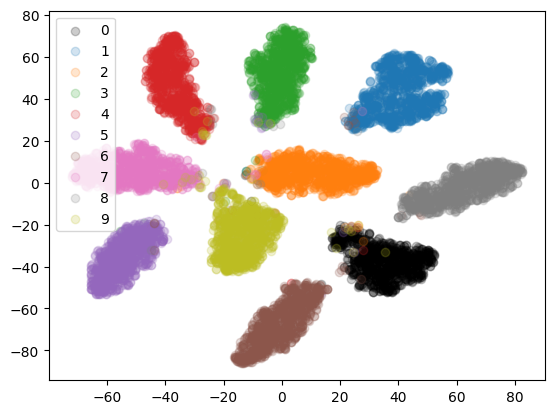

In [19]:
tsne = TSNE(n_components = 2)
t = tsne.fit_transform(xs)

for i in np.unique(ys):
    index = np.where(ys == i)[0]
    plt.scatter(t[index][:, 0], t[index][:, 1], alpha = 0.2, label = i, color = 'k' if i == 0 else None)
plt.legend()
plt.show()